In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from matplotlib import pyplot as plt
%matplotlib inline
iris = pd.read_csv('iris.data', names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'])
test_data=iris[iris['Name'].isin(['Iris-setosa', 'Iris-versicolor'])] 
# select 'Iris-setosa' and 'Iris-versicolor' data to form testing dataset as pd.dataframe format
test_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
target_class = {
    'Iris-setosa': 1,
    'Iris-versicolor' : -1
}
color = {
    1:'r',
    -1:'b'
}
test_data = test_data.assign(Class = test_data['Name'].map(target_class))
test_data = test_data.assign(Color = test_data['Class'].map(color))
test_data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Class,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,1,r
1,4.9,3.0,1.4,0.2,Iris-setosa,1,r
2,4.7,3.2,1.3,0.2,Iris-setosa,1,r
3,4.6,3.1,1.5,0.2,Iris-setosa,1,r
4,5.0,3.6,1.4,0.2,Iris-setosa,1,r
5,5.4,3.9,1.7,0.4,Iris-setosa,1,r
6,4.6,3.4,1.4,0.3,Iris-setosa,1,r
7,5.0,3.4,1.5,0.2,Iris-setosa,1,r
8,4.4,2.9,1.4,0.2,Iris-setosa,1,r
9,4.9,3.1,1.5,0.1,Iris-setosa,1,r


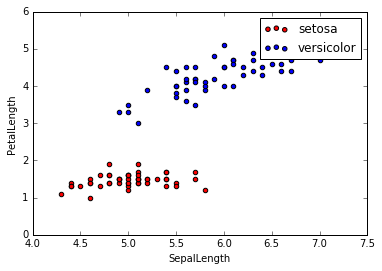

In [19]:
# plot data
ax=test_data[test_data['Class'] == 1].plot.scatter(x = 'SepalLength', y = 'PetalLength', color='r', label='setosa')
test_data[test_data['Class'] == -1].plot.scatter(x = 'SepalLength', y = 'PetalLength', color='b', label='versicolor', ax=ax)

In [20]:
y = test_data['Class'].to_numpy()
X = test_data.drop(columns=['SepalWidth','PetalWidth','Name', 'Class', 'Color']).to_numpy()
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [21]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [22]:
# bias = 1
X = np.insert(X, 0, 1, axis = 1)
X

array([[1. , 5.1, 1.4],
       [1. , 4.9, 1.4],
       [1. , 4.7, 1.3],
       [1. , 4.6, 1.5],
       [1. , 5. , 1.4],
       [1. , 5.4, 1.7],
       [1. , 4.6, 1.4],
       [1. , 5. , 1.5],
       [1. , 4.4, 1.4],
       [1. , 4.9, 1.5],
       [1. , 5.4, 1.5],
       [1. , 4.8, 1.6],
       [1. , 4.8, 1.4],
       [1. , 4.3, 1.1],
       [1. , 5.8, 1.2],
       [1. , 5.7, 1.5],
       [1. , 5.4, 1.3],
       [1. , 5.1, 1.4],
       [1. , 5.7, 1.7],
       [1. , 5.1, 1.5],
       [1. , 5.4, 1.7],
       [1. , 5.1, 1.5],
       [1. , 4.6, 1. ],
       [1. , 5.1, 1.7],
       [1. , 4.8, 1.9],
       [1. , 5. , 1.6],
       [1. , 5. , 1.6],
       [1. , 5.2, 1.5],
       [1. , 5.2, 1.4],
       [1. , 4.7, 1.6],
       [1. , 4.8, 1.6],
       [1. , 5.4, 1.5],
       [1. , 5.2, 1.5],
       [1. , 5.5, 1.4],
       [1. , 4.9, 1.5],
       [1. , 5. , 1.2],
       [1. , 5.5, 1.3],
       [1. , 4.9, 1.5],
       [1. , 4.4, 1.3],
       [1. , 5.1, 1.5],
       [1. , 5. , 1.3],
       [1. , 4.5

In [27]:
# the perceptron alogorithm implementation
def Perceptron(X,y, l_rate):
    w_history = [] # weight history
    w = np.array([-1, 1, 1]) # weight initialization w0 = threshhold
    w_old = np.ones(3)
    t = 0
    def sgn(v):
        if v >= 0:
            return 1
        else:
            return -1
    
    while np.linalg.norm(w-w_old) > 0.1:
        w_old = np.copy(w)
        count = 0 # counter for correctness
        for i, x in enumerate(X):
            # calculate the inner product between w and x
            v = np.dot(w,x)
            # pass the result of inner product to sgn() function
            sgn_v = sgn(v)
            if y[i] == 1 and sgn_v == -1:
                count = 0
                w = w + l_rate*x
                #print('Wrong Classification! {a} should be C1 but classified to C2'.format(a=x))
            elif y[i] == -1 and sgn_v == 1:
                count = 0
                w = w - l_rate*x
                #print('Wrong Classification! {a} should be C2 but classified to C1'.format(a=x))
            else:
                pass
                #count = count + 1
                #print('Correct Classification! No.{a} x = {b}'.format(a = count, b = x))
            #print('Current Weight:', w)
            #print('-----------------------------------------------------------------------')
            #print('{a:2d} iteration, w={b}'.format(a=t,b=w))
            t += 1
            w_history.append(w.copy())
    return w, w_history
            

In [36]:
w_correct, w_history = Perceptron(X,y, l_rate = 0.2)
print('Correct weight:', w_correct)
print('Num of iteration:', len(w_history))

Correct weight: [-0.6   1.06 -1.74]
Num of iteration: 700


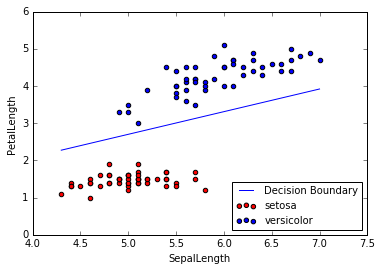

In [34]:
# plot data
plt.scatter(X[y==1, 1], X[y==1, 2], c='r', label='setosa')
plt.scatter(X[y==-1, 1], X[y==-1, 2], c='b', label='versicolor')
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
x_values = [np.min(X[:, 1] ), np.max(X[:, 1])]
y_values = - (w_correct[0] + np.dot(w_correct[1], x_values)) / w_correct[2]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.legend(loc='lower right', fontsize='medium')
plt.show()